<a href="https://colab.research.google.com/github/SaifonCh/code/blob/main/TestRegression_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import data file in Google Colab 
# After you run this, you can click to choose data file from your local computer

from google.colab import files

uploaded = files.upload()

Saving WeatherDataP.csv to WeatherDataP.csv


In [3]:
data = pd.read_csv("WeatherDataP.csv")
data  # Display the data


,Pressure (millibars),Humidity
0,1014.40,0.62
1,1014.20,0.66
2,1014.47,0.79
3,1014.45,0.82
4,1014.49,0.83
5,1014.52,0.85
6,1014.16,0.83
7,1014.24,0.78
8,1014.25,0.72
9,1013.96,0.61


number of data = 24


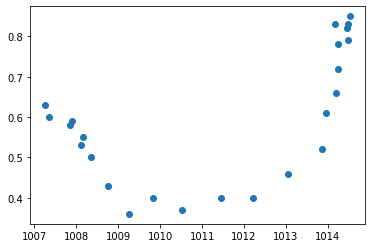

In [17]:
x_temp = data.iloc[:, 0]
len_x = len(x_temp)
x = data.iloc[1:len_x, 0]
y= data.iloc[1:len_x, 1]

print("number of data =", len_x-1)
#x = data[["Pressure (millibars)"]]
#y = data.Humidity
plt.scatter(x, y)
plt.show()

In [19]:
n = len(x) # Number of data points
print("Number of data points n =", n )
    
# Finding required sum for least square methods

sumX = np.sum(x)
sumX2= np.sum(x**2)
sumY = np.sum(y)
sumXY= np.sum(x*y)  #coponentwise multiplication

# Finding coefficients a0 and a1 from the formula:
a1 = (n*sumXY-sumX*sumY)/(n*sumX2-sumX*sumX)
a0 = (sumY - a1*sumX)/n
print("\nCoefficients are:")
print("a0: ", a0)
print("a1: ", a1)




Number of data points n = 24

Coefficients are:
a0:  -31.344661883740304
a1:  0.031578018922118374


In [20]:
# Alternatively, we can find the coefficients from the linear system below
A = np.array([[n,sumX],[sumX, sumX2]])
b = np.array([sumY, sumXY])
coeff = np.linalg.inv(A).dot(b)
print(coeff)
a0 = coeff[0]
a1 = coeff[1]
# Displaying coefficients a, b & equation
print("\nCoefficients are:")
print("a0: ", a0)
print("a1: ", a1)
print("And equation is: y = %0.4f + %0.4f x" %(a0,a1))

[-31.34466188   0.03157802]

Coefficients are:
a0:  -31.34466188398213
a1:  0.03157801892236028
And equation is: y = -31.3447 + 0.0316 x


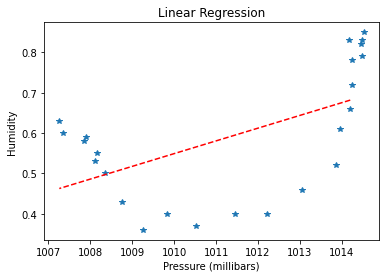

In [27]:
#plot
xgrid = np.linspace(x[1], x[n], 100)
y_xgrid = a1*xgrid +a0

plt.figure() 
plt.plot(x, y, '*')
plt.plot(xgrid, y_xgrid, 'r--')
plt.title("Linear Regression")
plt.xlabel("Pressure (millibars)")
plt.ylabel("Humidity")
plt.show()   # Show the figure (remove the previous instance)
